In [1]:
import pandas as pd
import matplotlib.pyplot as plt


filtered_alpine_sites = {
    "IT-Ren": {
        "PFT": "ENF", "Latitude": 46.5869, "Longitude": 11.4337, "ASL": 1730.0,
        "T_opt": 14.25, "PAR_0": 455.34, "alpha": 0.107, "beta": 1.829, "lambda": 0.213
    },
    "CH-Dav": {
        "PFT": "ENF", "Latitude": 46.8153, "Longitude": 9.8559, "ASL": 1639,
        "T_opt": 18.35, "PAR_0": 418.394, "alpha": 0.285, "beta": 0.545, "lambda": 0.236
    },
    "DE-Lkb": {
        "PFT": "ENF", "Latitude": 49.0996, "Longitude": 13.3047, "ASL": 1308,
        "T_opt": 22.6, "PAR_0": 191.804, "alpha": 0.190, "beta": 1.054, "lambda": 0.263
    },
    "IT-Lav": {
        "PFT": "ENF", "Latitude": 45.9562, "Longitude": 11.2813, "ASL": 1353,
        "T_opt": 22.1, "PAR_0": 468.815, "alpha": 0.135, "beta": 0.010, "lambda": 0.227
    },
    "IT-Tor": {
        "PFT": "GRA", "Latitude": 45.8444, "Longitude": 7.5781, "ASL": 2160,
        "T_opt": 16.4, "PAR_0": 698.177, "alpha": 0.193, "beta": 1.486, "lambda": 0.302
    },
    "IT-MBo": {
        "PFT": "GRA", "Latitude": 46.0147, "Longitude": 11.0458, "ASL": 1550,
        "T_opt": 19.7, "PAR_0": 445.598, "alpha": 0.404, "beta": 2.454, "lambda": 0.549
    },
    "AT-Neu": {
        "PFT": "GRA", "Latitude": 47.1167, "Longitude": 11.3175, "ASL": 970,
        "T_opt": 23.1, "PAR_0": 268.058, "alpha": 0.5, "beta": 4.101, "lambda": 0.722
    },
    "CH-Lae": {
        "PFT": "MF", "Latitude": 47.4781, "Longitude": 8.3650, "ASL": 689,
        "T_opt": 25.2, "PAR_0": 363.083, "alpha": 0.124, "beta": 2.555, "lambda": 0.183
    },
    "CH-Oe2": {
        "PFT": "CRO", "Latitude": 47.2863, "Longitude": 7.7343, "ASL": 452,
        "T_opt": 19.2, "PAR_0": 402.919, "alpha": 0.289, "beta": 1.147, "lambda": 0.203
    }
}


In [2]:

# # Constants for the standard model (VPRM Default from Mahadevan 2008)
# # Constants for Evergreen Forest
# Tmin_standard = 0
# Tmax_standard = 40
# Topt_standard = 20.0
# PAR0_standard = 262.0
# alpha_standard = 0.244
# beta_standard = 0.14
# lambd_standard = 0.234

# # Common parameters
# LSWI_x_percent = 0.5
# LSWI_max = 1.0
# EVI_CONST = 1.0
# PAR_CONST = 1000.0
# Pscale = 1.0

# # Create lists
# T2M_standard = range(Tmin_standard, Tmax_standard, 1)

# # Create a DataFrame for the standard model
# df_standard = pd.DataFrame(index=T2M_standard)
# Wscale_standard = (1 + LSWI_x_percent) / (1 + LSWI_max)
# Tscale_standard = [(((t - Tmin_standard) * (t - Tmax_standard)) / ((t - Tmin_standard) * (t - Tmax_standard) - (t - Topt_standard) ** 2)) for t in T2M_standard]
# GPP_standard = [(lambd_standard * ts * Pscale * Wscale_standard * EVI_CONST * PAR_CONST) / (1 + (PAR_CONST / PAR0_standard)) for ts in Tscale_standard]
# R_standard = [alpha_standard * t + beta_standard for t in T2M_standard]

# df_standard['GPP'] = GPP_standard
# df_standard['R'] = R_standard


# # Plotting
# fig, ax1 = plt.subplots()

# # Plot GPP lines
# ax1.plot(df_standard.index, df_standard['GPP'], label='GPP VPRM')
# ax1.plot(df_standard.index, df_standard['R'], 'r--', label='RECO VPRM')
# ax1.set_ylabel('[$\mu$mol/m²/s]')
# ax1.set_xlabel('T2M [K]')
# ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3))
# figname = "./VPRM_at_sites.pdf" 
# plt.savefig(figname, bbox_inches='tight')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# PFT-specific parameter table
pft_parameters = {
    "Evergreen": {"PAR_0": 207.69, "alpha": 0.18627740222039335, "beta": 1.6453495029934293, "lambda": 0.467, "Topt": 14.250},
    "Deciduous": {"PAR_0": 183.80, "alpha": 0.2323879681886519, "beta": 0.8678708197370003, "lambda": 0.361 , "Topt": 23.580},
    "Mixed Forest":  {"PAR_0": 240.39 , "alpha": 0.20136626041893155, "beta": 2.811577670752306, "lambda": 0.248, "Topt": 17.440},
    "Cropland": {"PAR_0":  364.15, "alpha": 0.24582294447901698, "beta": 1.1525179918498774, "lambda": 0.230, "Topt": 22.000 },
    "Grassland": {"PAR_0": 284.87, "alpha": 0.37784002921977233, "beta": 1.5010602215726705, "lambda": 0.771, "Topt": 15.880},
}

# Define vegetation type labels and colors
veg_labels = [
    "Evergreen", "Deciduous", "Mixed Forest", "Cropland", "Grassland"
]
colors = ["#006400", "#228B22", "#8FBC8F", "#FFA07A", "#7CFC00"]

# Constants
Tmin = 0
Tmax = 41
T2M_range = range(Tmin, Tmax)
LSWI_x_percent = 0.4
LSWI_max = 0.8
EVI_CONST = 1
PAR_CONST = 500.0
Pscale = 0.5
Wscale = (1 + LSWI_x_percent) / (1 + LSWI_max)


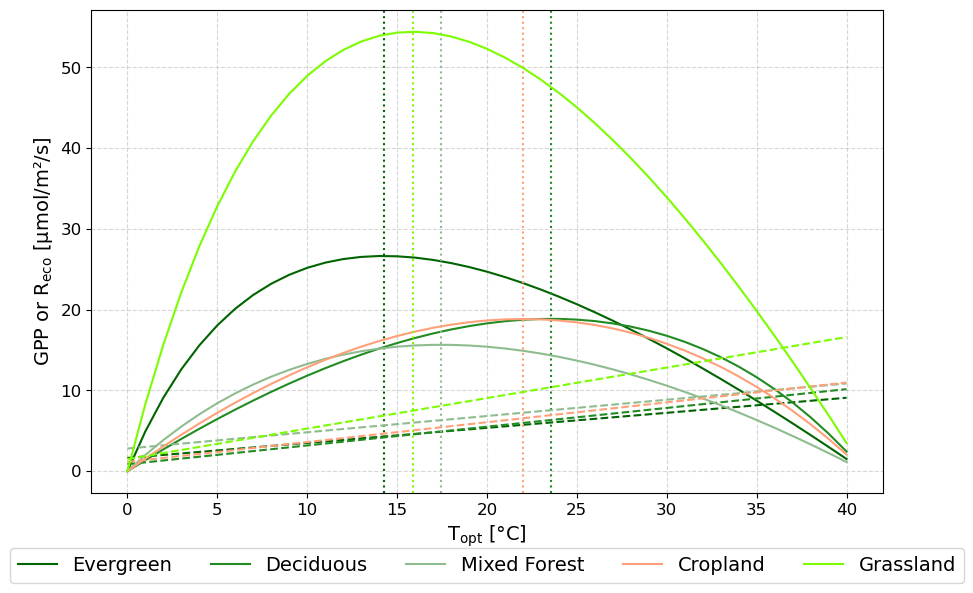

In [26]:

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

for i, (pft, params) in enumerate(pft_parameters.items()):
    PAR_0 = params["PAR_0"]
    alpha = params["alpha"]
    beta = params["beta"]
    lam = params["lambda"]
    T_opt = params["Topt"]

    # Tscale calc
    Tscale = [
        (((t - Tmin) * (t - Tmax)) / ((t - Tmin) * (t - Tmax) - (t - T_opt) ** 2))
        for t in T2M_range
    ]
    GPP = [
        (lam * ts * Pscale * Wscale * EVI_CONST * PAR_CONST) / (1 + (PAR_CONST / PAR_0))
        for ts in Tscale
    ]
    RECO = [alpha * t + beta for t in T2M_range]

    ax.plot(T2M_range, GPP, label=f"{pft}", color=colors[i])
    ax.plot(T2M_range, RECO, '--', color=colors[i]) # , label=f"{pft} $R_{{eco}}$"
    plt.axvline(T_opt, color=colors[i], linestyle=':', linewidth=1.5) # , label=f"{pft} $T_{{opt}}$"

# Final formatting
ax.set_xlabel(r"T$_\text{opt}$ [°C]", fontsize=14)
ax.set_ylabel(r"GPP or R$_{\text{eco}}$ [μmol/m²/s]", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
ax.tick_params(labelsize=12)
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=14)
plt.tight_layout()
plt.savefig("VPRM_pft_GPP_RECO.pdf", bbox_inches='tight')
plt.show()


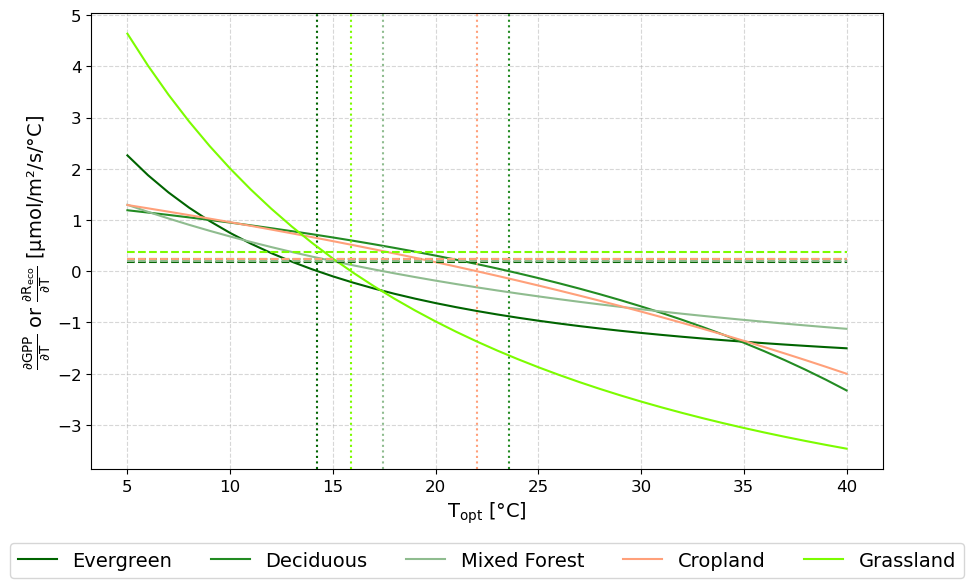

In [27]:

T2M_trimmed = list(T2M_range)[5:]

def dTscale_dT(T, Tmin, Tmax, Topt):
    a1 = T - Tmin
    a2 = T - Tmax
    a3 = T - Topt
    numerator = (a1 + a2) * (a1 * a2 - a3**2) - a1 * a2 * ((a1 + a2) - 2 * a3)
    denominator = (a1 * a2 - a3**2)**2
    if denominator != 0 and (a1 * a2) / (a1 * a2 - a3**2) >= 0:
        return numerator / denominator
    else:
        return 0.0

# Plot dTscale/dT
plt.figure(figsize=(10, 6))
for i, (pft, params) in enumerate(pft_parameters.items()):
    PAR_0 = params["PAR_0"]
    alpha = params["alpha"]
    beta = params["beta"]
    lam = params["lambda"]
    T_opt = params["Topt"]

    dTscale = [dTscale_dT(t, Tmin, Tmax, T_opt) for t in T2M_range]
    GPP_deriv = [
        (lam * dts * Pscale * Wscale * EVI_CONST * PAR_CONST) / (1 + (PAR_CONST / PAR_0))
        for dts in dTscale
    ]
    plt.plot(T2M_trimmed, GPP_deriv[5:], label=f"{pft}", color=colors[i])
    plt.axvline(T_opt, color=colors[i], linestyle=':', linewidth=1.5) # , label=f"{pft} T_opt"
# Plot dRECO/dT
#plt.figure(figsize=(10, 6))
for i, (pft, params) in enumerate(pft_parameters.items()):
    alpha = params["alpha"]
    beta = params["beta"]
    RECO = [alpha * t + beta for t in T2M_range]
    dRECOdT = pd.Series(RECO).diff().tolist()[1:]
    plt.plot(T2M_trimmed, dRECOdT[4:], color=colors[i], linestyle='--') # , label=f"{pft} d$R_{{eco}}$/dT"

plt.ylabel(r"$\frac{\partial \text{GPP}}{\partial \text{T}}$ or $\frac{\partial \text{R}_{\text{eco}}} {\partial \text{T}}$ [μmol/m²/s/°C]", fontsize=14)
plt.xlabel(r"T$_\text{opt}$ [°C]", fontsize=14)
plt.tick_params(labelsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.2), ncol=5, fontsize=14)
plt.tight_layout()
plt.savefig("VPRM_pft_dGPPdT.pdf", bbox_inches='tight')
plt.show()



# plt.ylabel("[μmol/m²/s/°C]", fontsize=14)
# plt.xlabel("[°C]", fontsize=14)
# plt.tick_params(labelsize=12)
# plt.grid(True, linestyle='--', alpha=0.5)
# plt.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=10)
# plt.tight_layout()
# plt.savefig("VPRM_pft_dRECOdT.pdf", bbox_inches='tight')
# plt.show()